Problem Statement:
    Analyze the data and generate recomendations/insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

In [2]:
# Basic Imports 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Import the Data
data = pd.read_csv("netflix_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Lets drop the 'description' column as it a text data col..
data.drop('description',axis=1,inplace=True)
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


In [5]:
data.shape

(8807, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


1. Seems like some data is missing in 'director','cast','country','date_added' columns
2. Except release_year all other columns seems to be object datatype.
3. We have 8807 data points and 11 features after dropping 'description' column

In [7]:
data.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN


## Lets explore each feature:
### type

In [8]:
data['type'].unique()


array(['Movie', 'TV Show'], dtype=object)

In [9]:
data['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

1. Given data has only two types of records.. i. Movie, ii.Tv Show.
2. And our data seems to be imbalanced, as we have more data points wrt Movie.

## Title

In [10]:
data['title'].value_counts()
# Ttitle seems to be unique for all 

Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: title, Length: 8807, dtype: int64

## Director

In [11]:
data['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

1. As mentioned above, Director column has many missing values.
2. We could also observe that each Movie/Tv Show has multiple directors. We need to split them across multiple rows.

In [12]:
# Unnesting director columns:
dirs = data['director'].apply(lambda x:str(x).split(',')).tolist()
dir_df = pd.DataFrame(dirs,index=data['title']).stack().reset_index()
dir_df.rename(columns = {0:'directors'},inplace=True)
dir_df.drop('level_1',axis=1,inplace=True)
dir_df

,title,directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


## Cast

In [13]:
data['cast'].value_counts()

David Attenborough                                                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       14
Samuel West                                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                                    7
David Spade, London Hughes, Fortune Feimster                                                                                                                                                   6
                                   

1. Cast Columns also have multiple/nested information. We have to unnest the information.

In [14]:
castSplit = data['cast'].apply(lambda x:str(x).split(', ')).tolist()
cast_df = pd.DataFrame(castSplit,index=data['title']).stack().reset_index()
cast_df.drop('level_1',axis=1,inplace=True)
cast_df.rename(columns={0:'cast'},inplace=True)
cast_df


,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


## Country

In [15]:
data['country'].unique()
# Country Columns also needs to be unnested

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [16]:
country = data['country'].apply(lambda x:str(x).split(', ')).tolist()
country_df = pd.DataFrame(country,index = data['title']).stack().reset_index()
country_df.rename(columns={0:'country'},inplace=True)
country_df.drop('level_1',axis=1,inplace=True)
country_df

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10840,Zodiac,United States
10841,Zombie Dumb,nan
10842,Zombieland,United States
10843,Zoom,United States


In [17]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


## Rating

In [18]:
data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

1. There few rows with uncommon names. we need to remove it when do data preprocessing.

## Listed_in

In [19]:
# Unnest the column listed_in

listed = data['listed_in'].apply(lambda x:str(x).split(', ')).tolist()
listed_df = pd.DataFrame(listed,index=data['title']).stack().reset_index()
listed_df.rename(columns={0:'listed_in'},inplace=True)
listed_df.drop('level_1',axis=1,inplace=True)

listed_df

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


# Merging all the unnested columns

In [20]:
df = dir_df.merge(cast_df,on='title',how='inner')
df = df.merge(country_df,on='title',how='inner')
df = df.merge(listed_df,on='title',how='inner')
df

,title,directors,cast,country,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows
...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies
201987,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies


In [21]:
#Dealing with Null avlues in df:

df['directors'].replace('nan','unknown directors',inplace=True)
df['cast'].replace('nan','unknown cast',inplace=True)
df['country'].replace('nan',np.nan,inplace=True)

In [22]:
df.head()


,title,directors,cast,country,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,Documentaries
1,Blood & Water,unknown directors,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,unknown directors,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,unknown directors,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,unknown directors,Khosi Ngema,South Africa,International TV Shows


In [23]:
df.isnull().sum()

title            0
directors        0
cast             0
country      11897
listed_in        0
dtype: int64

In [24]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [25]:
df_final = df.merge(data[['show_id', 'type', 'title','date_added',
       'release_year', 'rating', 'duration']],on='title',how='left')

df_final

,title,directors,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,unknown directors,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,unknown directors,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,unknown directors,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,unknown directors,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201987,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


## Now lets deal with missing values

In [26]:
# once again check for missing values:
df_final.isnull().sum()


title               0
directors           0
cast                0
country         11897
listed_in           0
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
dtype: int64

In [27]:
# First lets fill in missing values for  date_added

df_final.loc[df_final['date_added'].isna()]

,title,directors,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration
136893,A Young Doctor's Notebook and Other Stories,unknown directors,Daniel Radcliffe,United Kingdom,British TV Shows,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136894,A Young Doctor's Notebook and Other Stories,unknown directors,Daniel Radcliffe,United Kingdom,TV Comedies,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136895,A Young Doctor's Notebook and Other Stories,unknown directors,Daniel Radcliffe,United Kingdom,TV Dramas,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136896,A Young Doctor's Notebook and Other Stories,unknown directors,Jon Hamm,United Kingdom,British TV Shows,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136897,A Young Doctor's Notebook and Other Stories,unknown directors,Jon Hamm,United Kingdom,TV Comedies,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
186891,The Adventures of Figaro Pho,unknown directors,Charlotte Hamlyn,Australia,TV Comedies,s8183,TV Show,NaN,2015,TV-Y7,2 Seasons
186892,The Adventures of Figaro Pho,unknown directors,Stavroula Mountzouris,Australia,Kids' TV,s8183,TV Show,NaN,2015,TV-Y7,2 Seasons
186893,The Adventures of Figaro Pho,unknown directors,Stavroula Mountzouris,Australia,TV Comedies,s8183,TV Show,NaN,2015,TV-Y7,2 Seasons
186894,The Adventures of Figaro Pho,unknown directors,Aletheia Burney,Australia,Kids' TV,s8183,TV Show,NaN,2015,TV-Y7,2 Seasons


Imputation Idea :
    we can take when movie/show is released and take for mode of date_added of corresponding release_year and impute them with Null values

In [28]:
for year in df_final.loc[df_final['date_added'].isnull(),'release_year'].unique():
    imputer = df_final.loc[df_final['release_year']==year]['date_added'].mode().values[0]
    df_final.loc[df_final['release_year']==year,'date_added'] = df_final.loc[df_final['release_year']==year,'date_added'].fillna(imputer)
    

In [29]:
# We do the same logic for filling country missing values:

for director in df_final.loc[df_final['country'].isnull(),'directors'].unique():
    if director in df_final[~df_final['country'].isnull()]['directors'].unique():
        imputer = df_final.loc[df_final['directors']==director,['country']].mode().values[0][0]
        df_final.loc[df_final['directors']==director,'country']=df_final.loc[df_final['directors']==director,'country'].fillna(imputer)

In [30]:
# apply the same logic for country
df_final['country'].isnull().sum()

4673

In [31]:
for cast in df_final.loc[df_final['country'].isnull(),'cast'].unique():
    if cast in df_final.loc[~df_final['country'].isnull(),'cast'].unique():
        imputer = df_final.loc[df_final['cast']==cast,'country'].mode().values[0]
        df_final.loc[df_final['cast']==cast,'country'] == df_final.loc[df_final['cast']==cast,'country'].fillna(imputer)

In [32]:
df_final.isnull().sum()

title              0
directors          0
cast               0
country         4673
listed_in          0
show_id            0
type               0
date_added         0
release_year       0
rating            67
duration           3
dtype: int64

In [33]:
# Handling Duration column
df_final.loc[df_final['duration'].isnull(),'duration']=df_final.loc[df_final['duration'].isnull(),'duration'].fillna(df_final['rating'])
df_final.loc[df_final['rating'].str.contains('min', na=False),'rating']='NR'

In [34]:
# Seems like still there are empty country cells, we can replace it with some string:
df_final['country'].fillna('Unknown Country',inplace=True)       
df_final.isnull().sum()

title            0
directors        0
cast             0
country          0
listed_in        0
show_id          0
type             0
date_added       0
release_year     0
rating          67
duration         0
dtype: int64

In [35]:
# Lets deal with Rating column:
df_final['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', nan, 'TV-Y7-FV', 'UR'], dtype=object)

1. seems there are some rating values which does make sense: We can drop it off/ replace it with NR:

In [36]:
df_final.loc[df_final['rating'].str.contains('min',na=False),'rating'] = 'NR'

In [37]:
# Also replace Null values with NR:
df_final['rating'].fillna('NR',inplace = True)

In [38]:
df_final.isna().sum()

title           0
directors       0
cast            0
country         0
listed_in       0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [39]:
# Lets explore Duration column:
df_final['duration'].value_counts()

1 Season     35035
2 Seasons     9559
3 Seasons     5084
94 min        4343
106 min       4040
             ...  
3 min            4
5 min            3
11 min           2
8 min            2
9 min            2
Name: duration, Length: 220, dtype: int64

In [40]:
df_final_copy = df_final.copy()

In [41]:
# Lets remove 'mins' from duration column
df_final_copy['duration'] = df_final_copy['duration'].str.replace('min','')
df_final_copy

,title,directors,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90
1,Blood & Water,unknown directors,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,unknown directors,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,unknown directors,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,unknown directors,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111
201987,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,111
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,111
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111


In [42]:
# Replace duration column with seasons to 0.
df_final_copy.loc[df_final_copy['duration'].str.contains('Season'),'duration']=0
df_final_copy['duration'] = df_final_copy['duration'].astype('int')

C:\Users\91709\AppData\Local\Temp\ipykernel_28156\2819687804.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final_copy['duration'],kde=True)


<Axes: xlabel='duration', ylabel='Density'>

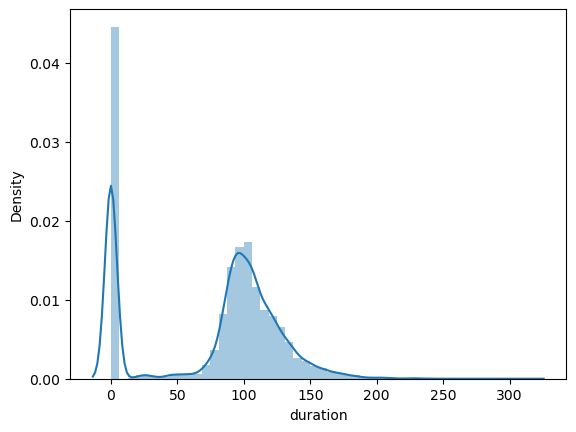

In [43]:
# Plotting above duration columns:
sns.distplot(df_final_copy['duration'],kde=True)

In [44]:
bins = [-1,1,50,80,100,120,150,200,315]
lables = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
df_final_copy['duration_copy'] = pd.cut(df_final_copy['duration'],bins = bins, labels = lables)

In [45]:
df_final_copy.head()

,title,directors,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,80-100
1,Blood & Water,unknown directors,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,0,<1
2,Blood & Water,unknown directors,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,0,<1
3,Blood & Water,unknown directors,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,0,<1
4,Blood & Water,unknown directors,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,0,<1


In [46]:
df_final_copy.duration_copy.value_counts()

<1         56148
80-100     52937
100-120    48724
120-150    26691
50-80       7700
150-200     6737
1-50        2530
200-315      524
Name: duration_copy, dtype: int64

In [47]:
# Lets explore date_Added column:
df_final_copy['modified_date_added'] = pd.to_datetime(df_final_copy['date_added'])
df_final_copy['month_added'] = df_final_copy['modified_date_added'].dt.month
df_final_copy['date_added'] = df_final_copy['modified_date_added'].dt.day
df_final_copy['year_added'] = df_final_copy['modified_date_added'].dt.year

In [48]:
df_final_copy.head()

,title,directors,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,duration_copy,modified_date_added,month_added,year_added
0,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,Documentaries,s1,Movie,25,2020,PG-13,90,80-100,2021-09-25,9,2021
1,Blood & Water,unknown directors,Ama Qamata,South Africa,International TV Shows,s2,TV Show,24,2021,TV-MA,0,<1,2021-09-24,9,2021
2,Blood & Water,unknown directors,Ama Qamata,South Africa,TV Dramas,s2,TV Show,24,2021,TV-MA,0,<1,2021-09-24,9,2021
3,Blood & Water,unknown directors,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,24,2021,TV-MA,0,<1,2021-09-24,9,2021
4,Blood & Water,unknown directors,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,24,2021,TV-MA,0,<1,2021-09-24,9,2021


## Univariate Analysis:

In [49]:
# Lets explore genre: Top 20 genre's
df_genre = df_final_copy.groupby(['listed_in']).agg({'title':'nunique'}).sort_values(by=['title'],ascending=False).reset_index()[:20]
df_genre

,listed_in,title
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


<Axes: xlabel='title', ylabel='listed_in'>

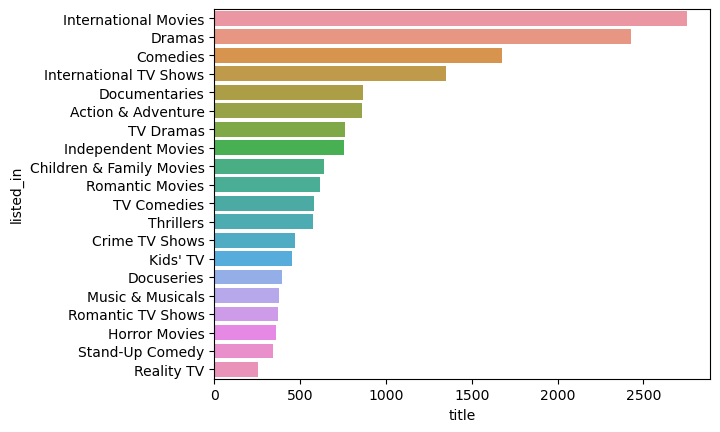

In [50]:
sns.barplot(data=df_genre,y = 'listed_in',x = 'title' ,orient='h')

From Above barplot, we can infer that internal MOvies. dramas, comedies, Internatial TV show are more popular

<Axes: xlabel='type', ylabel='count'>

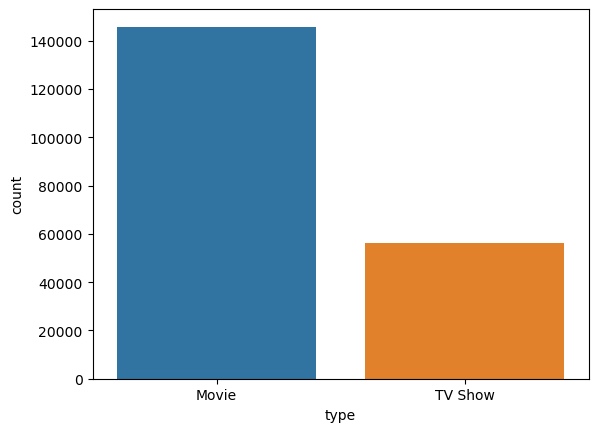

In [51]:
# Type column:
sns.countplot(data = df_final_copy,x='type')

1. from above we can infer that Platform has more movies comapretively.

In [52]:
#COuntry column:
df_final_copy['country'].value_counts()

United States     64632
India             23576
United Kingdom    12957
Japan              8864
France             8311
                  ...  
Palestine             2
Kazakhstan            1
Nicaragua             1
United States,        1
Uganda                1
Name: country, Length: 128, dtype: int64

If you observe above there are 2 different entries for same country 'United States' & 'United States,'. We handle them

In [53]:
df_final_copy['country'] = df_final_copy['country'].str.replace(',','')

In [54]:
df_final_copy['country'].value_counts()

United States     64633
India             23576
United Kingdom    12977
Japan              8864
France             8311
                  ...  
Panama                2
Mongolia              2
Kazakhstan            1
Nicaragua             1
Uganda                1
Name: country, Length: 124, dtype: int64

<Axes: xlabel='country', ylabel='count'>

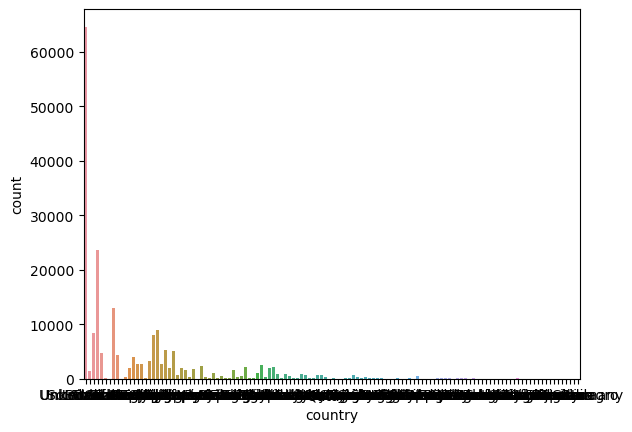

In [55]:
sns.countplot(data=df_final_copy,x='country')

<Axes: xlabel='title', ylabel='country'>

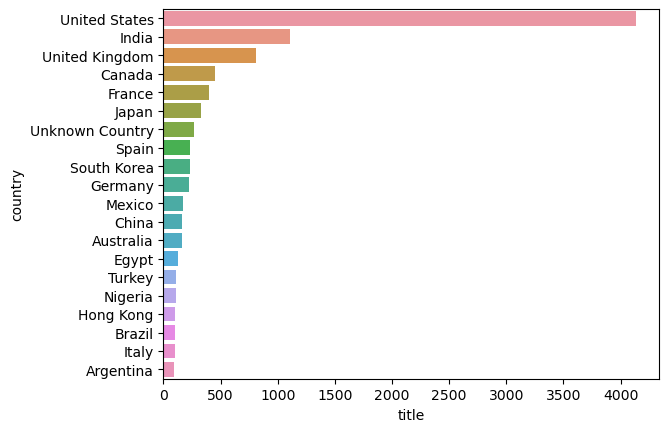

In [56]:
# :Lets plot only top 20 countries which use netflix much

countries = df_final_copy.groupby(['country']).agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending = False)[:20]
sns.barplot(data= countries,x='title',y='country',orient='h')

1. from above we can infer that platform is more popular in US, following India, Uk & canada

<Axes: xlabel='count', ylabel='rating'>

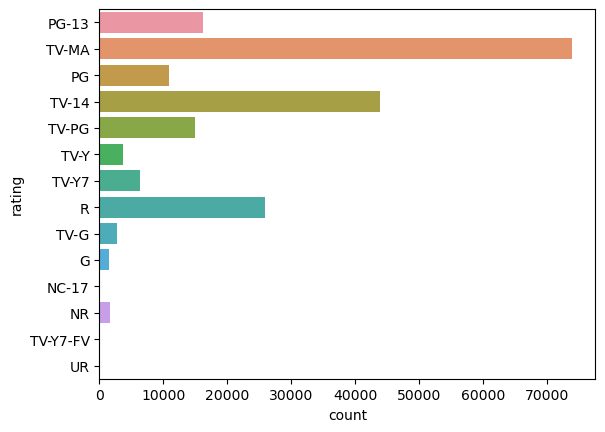

In [57]:
# EXplroe ratings column:
sns.countplot(data=df_final_copy,y='rating',orient='h')

1. Most of the shows been rated under TV_MA, TV_14 & R

In [58]:
# Exploring DUration col from data:
df_final['duration'].value_counts()

1 Season     35035
2 Seasons     9559
3 Seasons     5084
94 min        4343
106 min       4040
             ...  
3 min            4
5 min            3
11 min           2
8 min            2
9 min            2
Name: duration, Length: 220, dtype: int64

<Axes: xlabel='title', ylabel='duration'>

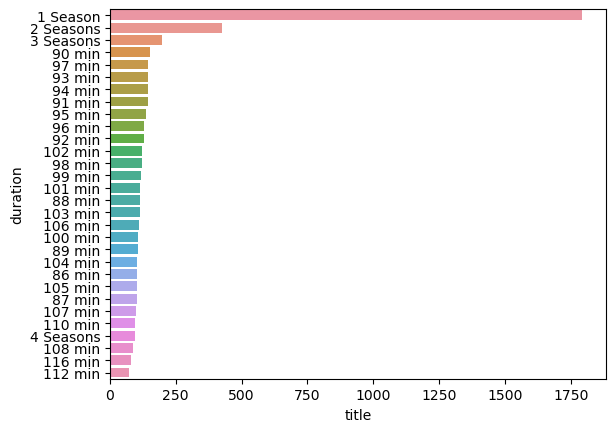

In [59]:
duration_df  = df_final.groupby(['duration']).agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)[:30]
sns.barplot(data=duration_df,x='title',y='duration',orient='h')

1. From above graph we can infer that most of the Tv show have only one season.. Duration of movies lies in 90 to 110 mins.

In [60]:
# Lets explore Cast col:
df_final_copy['cast'].value_counts()

unknown cast      2146
Liam Neeson        161
Alfred Molina      160
John Krasinski     139
Salma Hayek        130
                  ... 
Dario Yazbek         1
Corinne Foxx         1
Jacob Craner         1
Laila Berzins        1
Richard Ryan         1
Name: cast, Length: 36440, dtype: int64

<Axes: xlabel='title', ylabel='cast'>

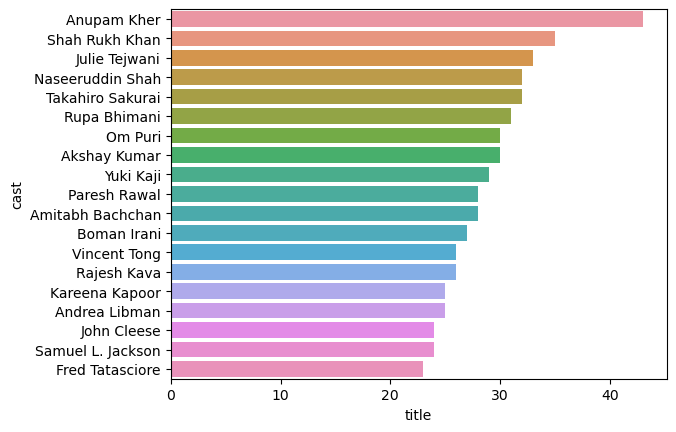

In [61]:
# top 10 popular actors
cast_df = df_final_copy.groupby(['cast']).agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)[1:20]
sns.barplot(data=cast_df,x='title',y='cast',orient='h')

1. Anupam Kher, Shah Rukh Khan, Hulie Tejwani, Naseeruddin Shah are popular actors

In [62]:
# Explore directors column:
df_final_copy['directors'].value_counts()

unknown directors      50643
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
                       ...  
Gautier & Leduc            1
Robb Dipple                1
Glenn Weiss                1
Lyric R. Cabral            1
Kirsten Johnson            1
Name: directors, Length: 5121, dtype: int64

<Axes: xlabel='title', ylabel='directors'>

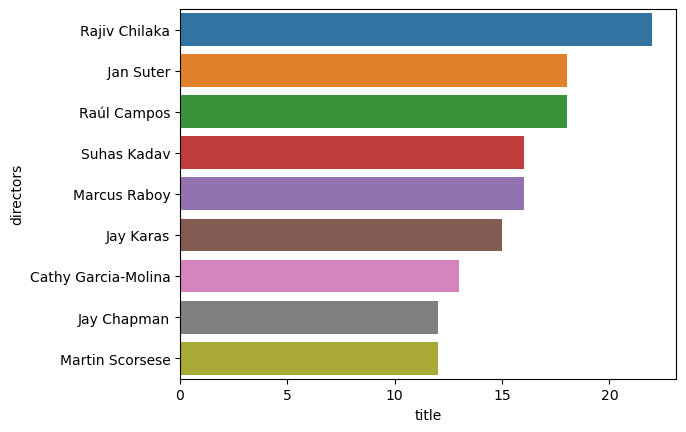

In [63]:
# Getting top 10 directors
dirs = df_final_copy.groupby(['directors']).agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)[1:10]
sns.barplot(data = dirs,y='directors',x='title',orient='h')

1. Rajiv Chilaka, Jan Suter, Raul Campos, Suhas Kadav are popular directors on the pltform.

In [64]:
# Year column:
df_final_copy.year_added.value_counts()

2019    47033
2020    46025
2021    36541
2018    35785
2017    25233
2016     8614
2015     1560
2014      450
2011      438
2013      207
2012       36
2009       30
2010       20
2008       19
Name: year_added, dtype: int64

<Axes: xlabel='year_added', ylabel='title'>

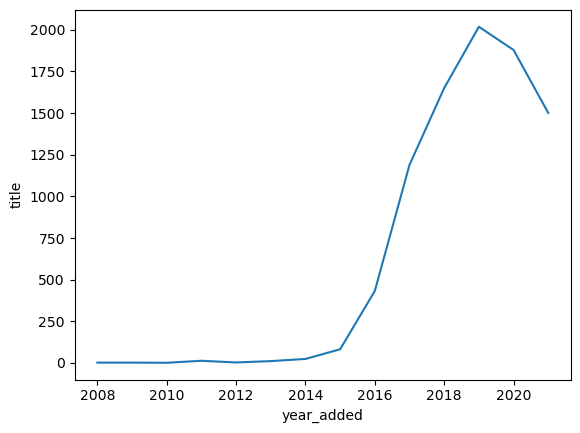

In [65]:
 years = df_final_copy.groupby(['year_added']).agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.lineplot(data=years,x='year_added',y='title')

1. Due course of time movies/tv shows added increasing. but theres is a dip after 2018.

<Axes: xlabel='month_added', ylabel='title'>

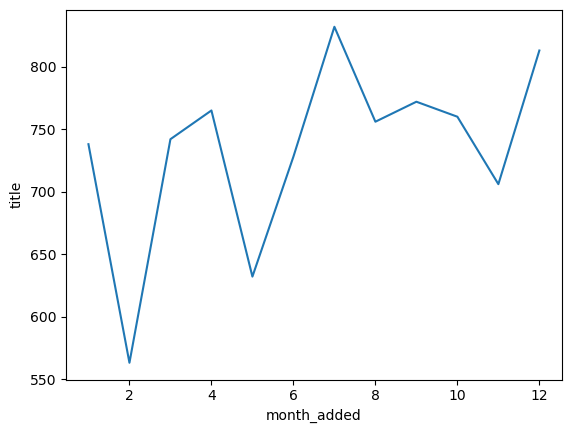

In [66]:
# Explore month col
month=df_final_copy.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=month, x='month_added', y='title')

1. We can observe from above is first month & last month more content is added to platform.

## Bivariate Analysis

In [67]:
df_final_copy['duration'] = df_final['duration']
df_final_copy.head()

,title,directors,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,duration_copy,modified_date_added,month_added,year_added
0,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,Documentaries,s1,Movie,25,2020,PG-13,90 min,80-100,2021-09-25,9,2021
1,Blood & Water,unknown directors,Ama Qamata,South Africa,International TV Shows,s2,TV Show,24,2021,TV-MA,2 Seasons,<1,2021-09-24,9,2021
2,Blood & Water,unknown directors,Ama Qamata,South Africa,TV Dramas,s2,TV Show,24,2021,TV-MA,2 Seasons,<1,2021-09-24,9,2021
3,Blood & Water,unknown directors,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,24,2021,TV-MA,2 Seasons,<1,2021-09-24,9,2021
4,Blood & Water,unknown directors,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,24,2021,TV-MA,2 Seasons,<1,2021-09-24,9,2021


In [68]:
df_final_copy.isna().sum()

title                  0
directors              0
cast                   0
country                0
listed_in              0
show_id                0
type                   0
date_added             0
release_year           0
rating                 0
duration               0
duration_copy          0
modified_date_added    0
month_added            0
year_added             0
dtype: int64

From univariate Analysis, we can find/extract below insights:
    1. Across all the countries, International movies, Dramas, Comedies, INternational Tv shows are Popular. Using Bivariate we also find at country level granularity i.e, popular gener's in a country.
    2. Using Bivarite Analysis, we can analyse what the countries for TVshow and MOvies resp.
    3. Instead of doing granular analysis on all the countries, we can do it on top 5 countries from where netflix is generating revenue i,e. US, India, UK,canada, France.
    4. We can also split movies and Tvshows, do analysis for specific country.
    5. popular directors across countries and its combination with popular actor in a country.

In [69]:
# Lets Segregate data into mOvies & Tv shows:
movies = df_final_copy.loc[df_final_copy['type']=='Movie']
tvshows = df_final_copy.loc[df_final_copy['type']=='TV Show']

In [70]:
# Check for countries which are popular for movies
movies.groupby('country').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)

,country,title
111,United States,2840
42,India,1020
110,United Kingdom,538
19,Canada,322
33,France,304
...,...,...
73,Nicaragua,1
78,Panama,1
31,Ethiopia,1
29,Ecuador,1


Movies are popular across US, India, Uk, Canada, france

In [71]:
tvshows.groupby('country').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)

,country,title
63,United States,1293
62,United Kingdom,273
30,Japan,199
52,South Korea,170
8,Canada,126
...,...,...
55,Switzerland,1
23,Hungary,1
36,Malta,1
37,Mauritius,1


Tvshows are popular across US,UK,Japan,South Korea, Canada

In [72]:
# Will filter moviesacross popular countries
movieCountries = ['United States','India','United Kingdom','Canada','France']
tvshowsCountries = ['United States','United Kingdom','Japan','South Korea','Canada']

In [73]:
movies = movies.loc[movies['country'].apply(lambda x:x in movieCountries)]
tvshows = tvshows.loc[tvshows['country'].apply(lambda x:x in tvshowsCountries)]

In [74]:
movies.country.value_counts()

United States     46361
India             22173
United Kingdom     8589
France             6637
Canada             5771
Name: country, dtype: int64

In [75]:
tvshows.country.value_counts()

United States     18272
Japan              5154
United Kingdom     4388
South Korea        3754
Canada             2177
Name: country, dtype: int64

In [76]:
# Lets Explore movies at country granularity:
movies.head()

,title,directors,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,duration_copy,modified_date_added,month_added,year_added
0,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,Documentaries,s1,Movie,25,2020,PG-13,90 min,80-100,2021-09-25,9,2021
179,Sankofa,Haile Gerima,Kofi Ghanaba,United States,Dramas,s8,Movie,24,1993,TV-MA,125 min,120-150,2021-09-24,9,2021
180,Sankofa,Haile Gerima,Kofi Ghanaba,United States,Independent Movies,s8,Movie,24,1993,TV-MA,125 min,120-150,2021-09-24,9,2021
181,Sankofa,Haile Gerima,Kofi Ghanaba,United States,International Movies,s8,Movie,24,1993,TV-MA,125 min,120-150,2021-09-24,9,2021
188,Sankofa,Haile Gerima,Kofi Ghanaba,United Kingdom,Dramas,s8,Movie,24,1993,TV-MA,125 min,120-150,2021-09-24,9,2021


In [77]:
# Check for popular directors in US:
popularUsDirectors = movies.loc[movies['country']=='United States'].groupby('directors').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)[1:16]



<Axes: xlabel='title', ylabel='directors'>

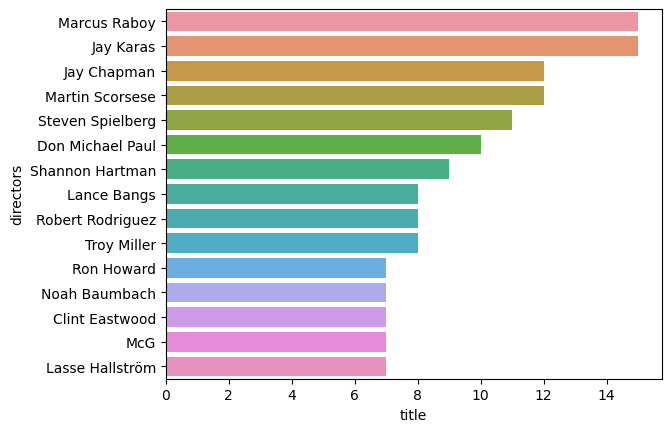

In [78]:
sns.barplot(data=popularUsDirectors,x = 'title',y='directors',orient='h')

1. Top directors in United States are Marcus Raboy, Jay Karas, Jay Chapman, MArtin Scorsese, steven spielberg

In [79]:
popularUsCast = movies.loc[movies['country']=='United States'].groupby('cast').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)[1:15]
popularUsCast


,cast,title
10083,Samuel L. Jackson,21
109,Adam Sandler,20
4794,James Franco,19
8562,Nicolas Cage,18
2869,David Spade,16
10310,Seth Rogen,15
1625,Bruce Willis,15
3857,Fred Tatasciore,15
10928,Tara Strong,15
8275,Morgan Freeman,15


<Axes: xlabel='title', ylabel='cast'>

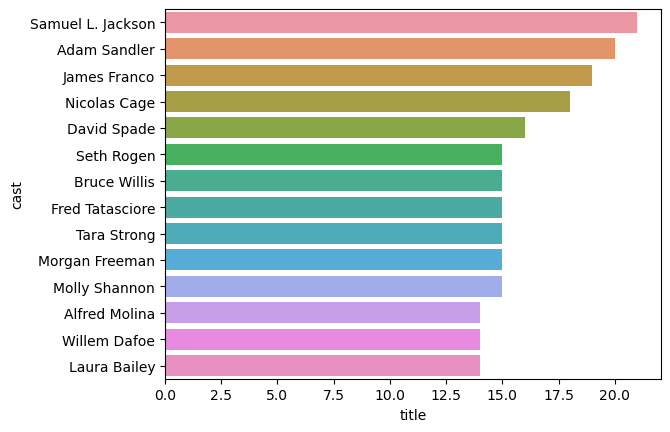

In [80]:
sns.barplot(data = popularUsCast, x = 'title',y='cast',orient='h')

1. Top actors are Samuel L.Jackson, Adam Sandler, James Franco, Nicolas Cage, David Spade

In [81]:
# Top genres in Unites states: Lets Take top 15
popularUsGenre = movies.loc[movies['country']=='United States'].groupby('listed_in').agg({'title':'nunique'}).reset_index().sort_values(by = 'title',ascending= False)[:15]
popularUsGenre

,listed_in,title
7,Dramas,843
4,Comedies,692
6,Documentaries,531
2,Children & Family Movies,413
0,Action & Adventure,404
10,Independent Movies,390
19,Thrillers,292
18,Stand-Up Comedy,232
15,Romantic Movies,230
9,Horror Movies,202


<Axes: xlabel='title', ylabel='listed_in'>

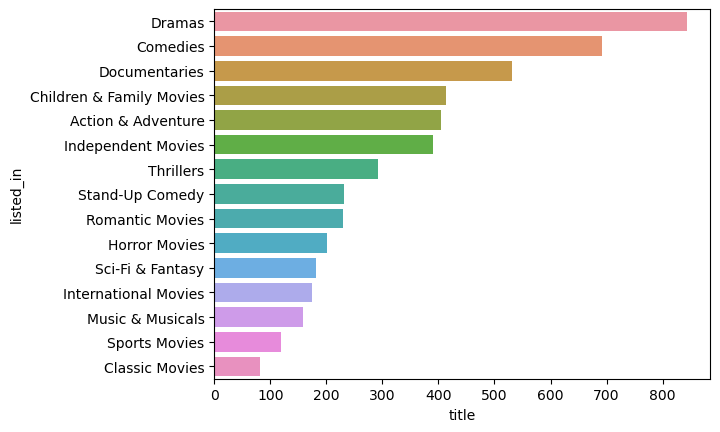

In [82]:
sns.barplot(data=popularUsGenre,x='title',y='listed_in',orient='h')

1. Popular gener in Us is Dramas, Comedies, Documentaries, Children & Family Movies, Action & Adventure

In [83]:
# Lets find top  5 rating in US that people watch:
popularRatings = movies.loc[movies['country']=='United States'].groupby('rating').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)[:5]
popularRatings

,rating,title
8,TV-MA,751
5,R,660
4,PG-13,436
6,TV-14,290
3,PG,244


<Axes: xlabel='title', ylabel='rating'>

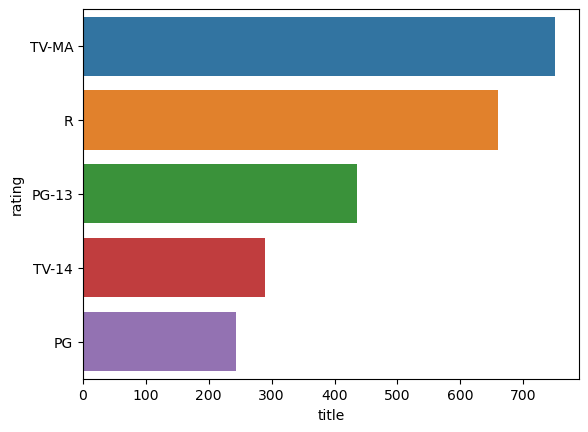

In [84]:
sns.barplot(data=popularRatings,x='title',y='rating',orient='h')

1. Top 5 Ratings in US are TV-MA, R, PG-13, TV-14,PG

In [85]:
# length of the movies, people like to watch in Unites states:
duration = movies.loc[movies['country']=='United States'].groupby('duration').agg({'title':'nunique'}).reset_index().sort_values(by = 'title',ascending= False)[:1]
duration

,duration,title
163,90 min,89


<Axes: xlabel='duration', ylabel='count'>

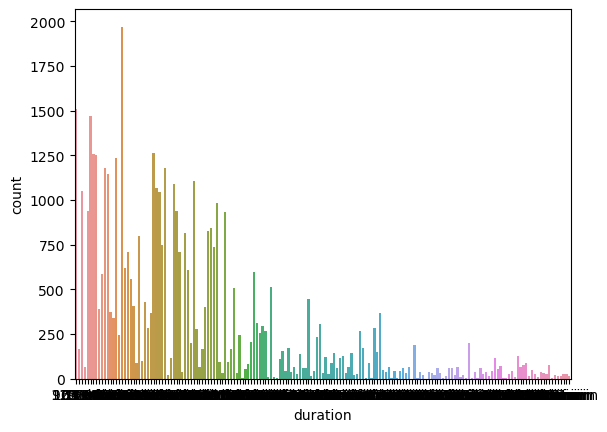

In [86]:
sns.countplot(data=movies.loc[movies['country']=='United States'],x = 'duration')

<Axes: xlabel='title', ylabel='duration'>

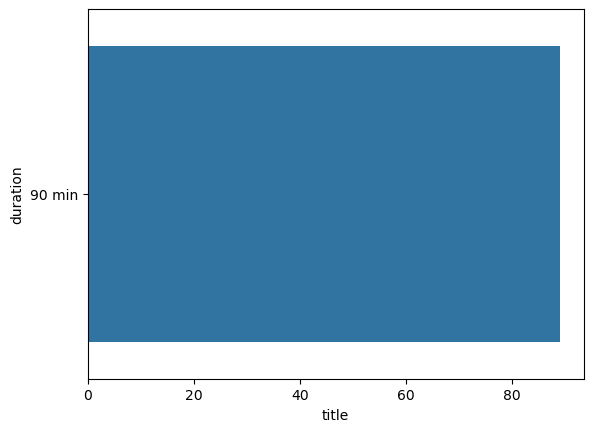

In [87]:
sns.barplot(data=duration,y='duration',x='title',orient='h')

1. Most of the movies in US are of 90min approx.

In [88]:
# when movies are added to platform  Unites states:
monthAdded = movies.loc[movies['country']=='United States'].groupby('month_added').agg({'title':'nunique'}).reset_index().sort_values(by = 'title',ascending= False)
monthAdded

,month_added,title
0,1,326
10,11,260
6,7,258
8,9,250
9,10,247
7,8,239
3,4,235
11,12,234
2,3,220
5,6,212


<Axes: xlabel='title', ylabel='month_added'>

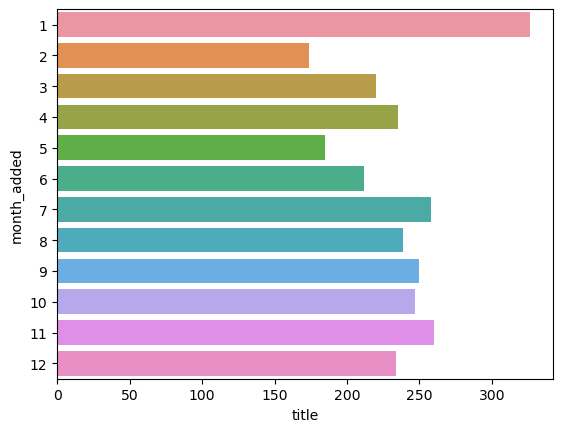

In [89]:
sns.barplot(data=monthAdded,y='month_added',x='title',orient='h')

1. Most of the movies been in 1st month. but reletively netflix is adding movies evevry month, less comparetively to 1st month.

<Axes: xlabel='year_added', ylabel='title'>

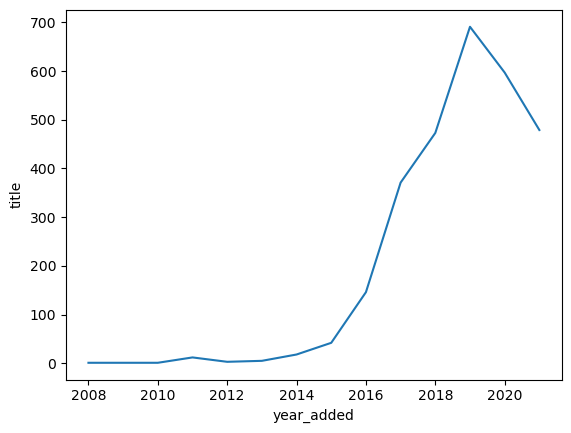

In [90]:
yearAdded = movies.loc[movies['country']=='United States'].groupby('year_added').agg({'title':'nunique'}).reset_index().sort_values(by = 'title',ascending= False)
sns.lineplot(data=yearAdded,x='year_added',y='title')

1. we could observe a much decrease in movies added in 2021

In [91]:
movies.head()

,title,directors,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,duration_copy,modified_date_added,month_added,year_added
0,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,Documentaries,s1,Movie,25,2020,PG-13,90 min,80-100,2021-09-25,9,2021
179,Sankofa,Haile Gerima,Kofi Ghanaba,United States,Dramas,s8,Movie,24,1993,TV-MA,125 min,120-150,2021-09-24,9,2021
180,Sankofa,Haile Gerima,Kofi Ghanaba,United States,Independent Movies,s8,Movie,24,1993,TV-MA,125 min,120-150,2021-09-24,9,2021
181,Sankofa,Haile Gerima,Kofi Ghanaba,United States,International Movies,s8,Movie,24,1993,TV-MA,125 min,120-150,2021-09-24,9,2021
188,Sankofa,Haile Gerima,Kofi Ghanaba,United Kingdom,Dramas,s8,Movie,24,1993,TV-MA,125 min,120-150,2021-09-24,9,2021


In [92]:
#Lets Observe for TV Shows in US:
tvshows.head()

,title,directors,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,duration_copy,modified_date_added,month_added,year_added
85,Jailbirds New Orleans,unknown directors,unknown cast,United States,Docuseries,s4,TV Show,24,2021,TV-MA,1 Season,<1,2021-09-24,9,2021
86,Jailbirds New Orleans,unknown directors,unknown cast,United States,Reality TV,s4,TV Show,24,2021,TV-MA,1 Season,<1,2021-09-24,9,2021
111,Midnight Mass,Mike Flanagan,Kate Siegel,United States,TV Dramas,s6,TV Show,24,2021,TV-MA,1 Season,<1,2021-09-24,9,2021
112,Midnight Mass,Mike Flanagan,Kate Siegel,United States,TV Horror,s6,TV Show,24,2021,TV-MA,1 Season,<1,2021-09-24,9,2021
113,Midnight Mass,Mike Flanagan,Kate Siegel,United States,TV Mysteries,s6,TV Show,24,2021,TV-MA,1 Season,<1,2021-09-24,9,2021


In [93]:
# popular directors for Tvshows in US:

poptvshowsDir = tvshows.loc[tvshows['country']=='United States'].groupby('directors').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
poptvshowsDir

,directors,title
91,unknown directors,1222
59,Ken Burns,3
54,Joe Berlinger,2
77,Rob Seidenglanz,2
81,Stan Lathan,2
...,...,...
28,Alex Gibney,1
27,Alejandro Lozano,1
26,Alastair Fothergill,1
25,Adrián García Bogliano,1


<Axes: xlabel='directors', ylabel='title'>

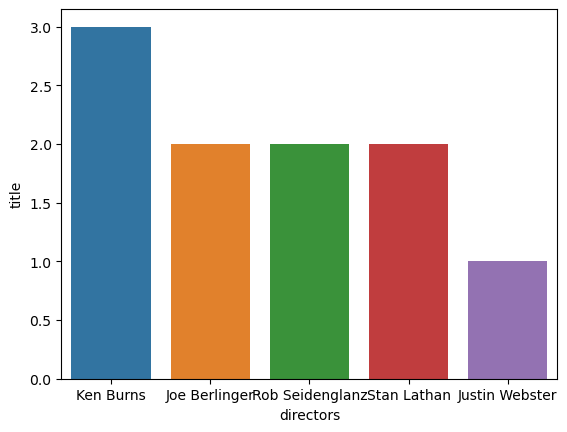

In [94]:
sns.barplot(data=poptvshowsDir[1:6],x='directors',y='title')

1. Ken Burns,Joe Berlinger, Rob Seidenglanz are the popular tvshow directors in US.

                          cast  title
6843              unknown cast    230
2304              Grey Griffin     10
6575              Vincent Tong     10
3574  Kevin Michael Richardson      9
3402             Kari Wahlgren      8
...                        ...    ...
2501         Hunter Reese Peña      1
2500            Hunter Parrish      1
2499       Hunter Page-Lochard      1
2497               Hunter Deno      1
6849            İlayda Akdoğan      1

[6850 rows x 2 columns]


<Axes: xlabel='cast', ylabel='title'>

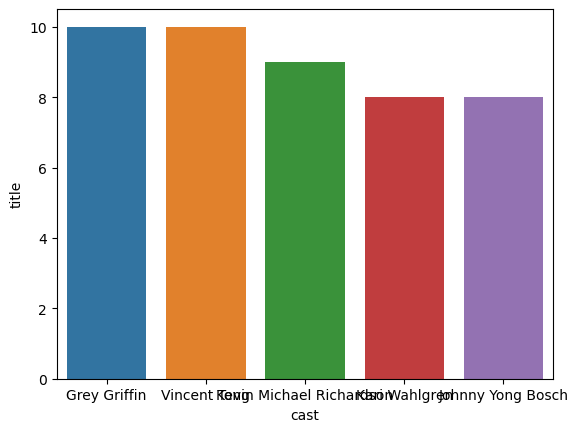

In [95]:
# popular cast for Tvshows in US:

poptvshowscast = tvshows.loc[tvshows['country']=='United States'].groupby('cast').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
print(poptvshowscast)
sns.barplot(data=poptvshowscast[1:6],x='cast',y='title')

1. Grey Griffin,Vincent Tong,Kevin Michael Richardson,Kari Wahlgren  are the popular cast/actors for TVhsows in US.

                       listed_in  title
14                   TV Comedies    328
15                     TV Dramas    325
6                       Kids' TV    293
5         International TV Shows    274
4                     Docuseries    246
3                 Crime TV Shows    186
8                     Reality TV    173
9              Romantic TV Shows    108
13         TV Action & Adventure    106
18           TV Sci-Fi & Fantasy     64
10           Science & Nature TV     57
17                  TV Mysteries     56
11     Spanish-Language TV Shows     54
12  Stand-Up Comedy & Talk Shows     41
16                     TV Horror     39
0                   Anime Series     39
1               British TV Shows     38
21                 Teen TV Shows     36
20                  TV Thrillers     31
7                Korean TV Shows     18
2              Classic & Cult TV     17
19                      TV Shows      9


<Axes: xlabel='listed_in', ylabel='title'>

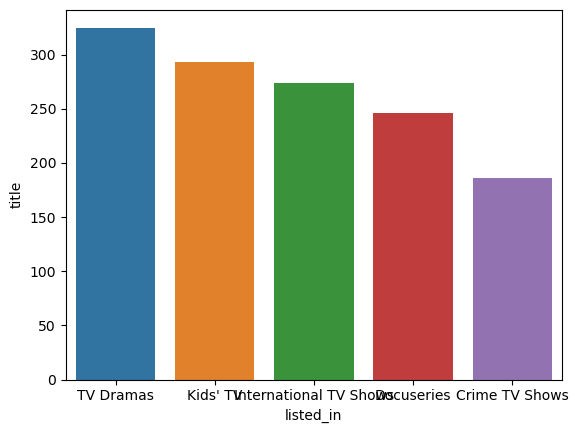

In [96]:
# 5 popular genre for Tvshows in US:

poptvshowsgenre = tvshows.loc[tvshows['country']=='United States'].groupby('listed_in').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
print(poptvshowsgenre)
sns.barplot(data=poptvshowsgenre[1:6],x='listed_in',y='title')

1. Popular Tvshow genre people watch in US are TV Dramas, Kids TV, International TV shows etc

    month_added  title
8             9    142
6             7    126
5             6    118
11           12    112
7             8    111
0             1    107
9            10    102
10           11    100
4             5     99
3             4     98
1             2     90
2             3     88


<Axes: xlabel='month_added', ylabel='title'>

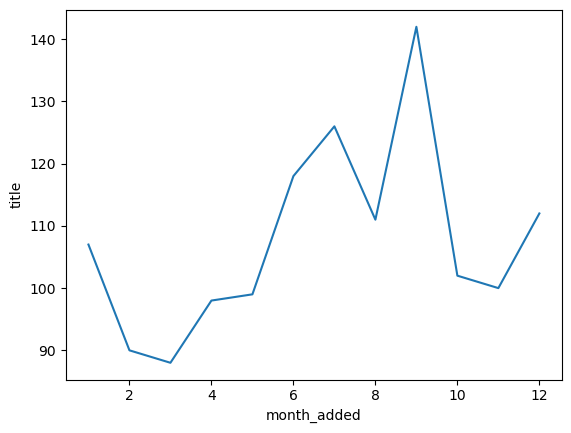

In [97]:
# what month is popular for Tvshows added in US:

poptvshowsmonthadded = tvshows.loc[tvshows['country']=='United States'].groupby('month_added').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
print(poptvshowsmonthadded)
sns.lineplot(data=poptvshowsmonthadded,x='month_added',y='title')

1. more tvshows been added to netflix in the month of sept,july

   year_added  title
8        2020    288
9        2021    288
7        2019    261
6        2018    217
5        2017    136
4        2016     76
3        2015     17
1        2013      5
2        2014      4
0        2008      1


<Axes: xlabel='year_added', ylabel='title'>

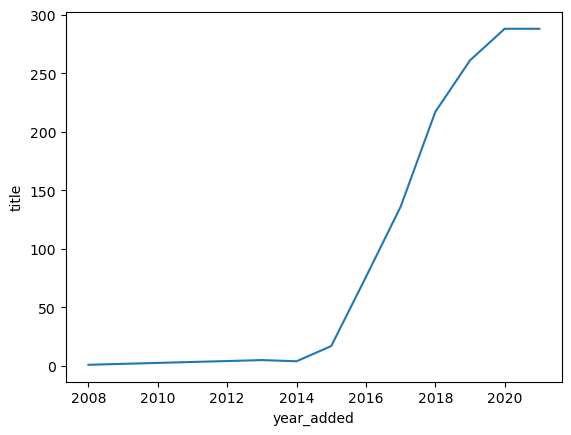

In [98]:
# what year is popular for Tvshows added in US:

poptvshowsyearadded = tvshows.loc[tvshows['country']=='United States'].groupby('year_added').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
print(poptvshowsyearadded)
sns.lineplot(data=poptvshowsyearadded,x='year_added',y='title')

1. We could see Tvhows added to netflix has good shape

<Axes: xlabel='release_year', ylabel='title'>

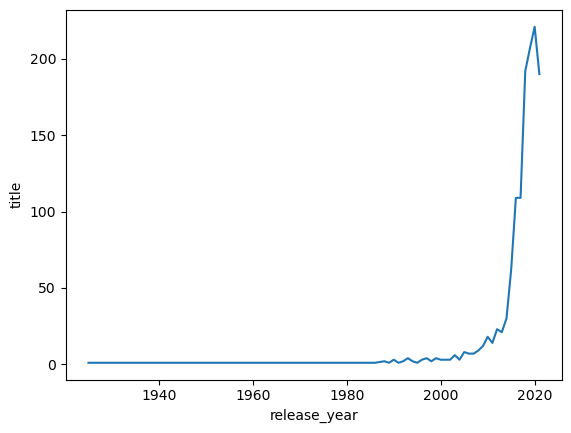

In [99]:
# what year is popular for Tvshows added in US:

poptvshowsrelease_year = tvshows.loc[tvshows['country']=='United States'].groupby('release_year').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.lineplot(data=poptvshowsrelease_year,x='release_year',y='title')

1. less number of tvshows been added in 2021, comparetively <2020.

In [100]:
# till now we extracted insights of Movies/TV shows of US. Now lets do analysis for India.

In [101]:
indianMovies = df_final_copy.loc[(df_final_copy['country']=='India') & (df_final_copy['type']=='Movie')]
indianShows = df_final_copy.loc[(df_final_copy['country']=='India') & (df_final_copy['type']=='TV Show')]

In [102]:
indianMovies.head()

,title,directors,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,duration_copy,modified_date_added,month_added,year_added
641,Jeans,S. Shankar,Prashanth,India,Comedies,s25,Movie,21,1998,TV-14,166 min,150-200,2021-09-21,9,2021
642,Jeans,S. Shankar,Prashanth,India,International Movies,s25,Movie,21,1998,TV-14,166 min,150-200,2021-09-21,9,2021
643,Jeans,S. Shankar,Prashanth,India,Romantic Movies,s25,Movie,21,1998,TV-14,166 min,150-200,2021-09-21,9,2021
644,Jeans,S. Shankar,Aishwarya Rai Bachchan,India,Comedies,s25,Movie,21,1998,TV-14,166 min,150-200,2021-09-21,9,2021
645,Jeans,S. Shankar,Aishwarya Rai Bachchan,India,International Movies,s25,Movie,21,1998,TV-14,166 min,150-200,2021-09-21,9,2021


<Axes: xlabel='title', ylabel='directors'>

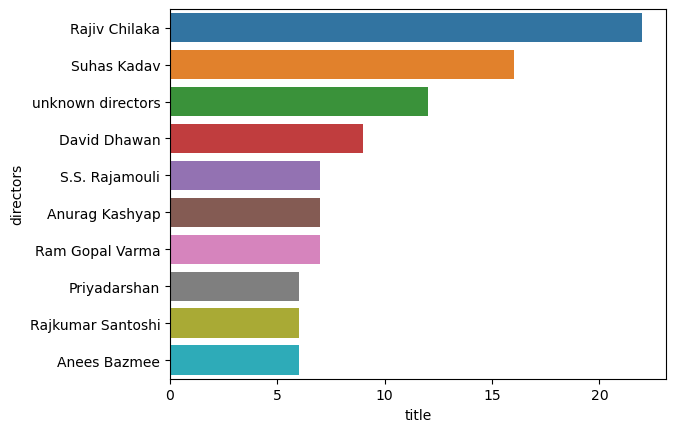

In [103]:
# check for popular directors in India:

popIndDir = indianMovies.groupby('directors').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.barplot(data=popIndDir[:10],x='title',y='directors')

1. Popular directror in India are Rajiv Chilaka, Suhas Kadav, David Dhawan, S.S. Rajamouli, Anurah Kashyap

<Axes: xlabel='title', ylabel='cast'>

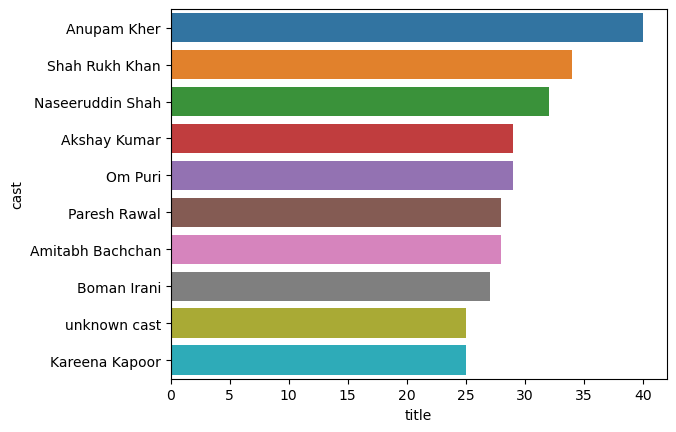

In [104]:
# check for popular actor in India
popIndActors = indianMovies.groupby('cast').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.barplot(data=popIndActors[:10],x='title',y='cast')

1. Popular director in india are Anupam Kher, Shah Rukh Khan, Naseeruddin Shah, Akshay Kumar

<Axes: xlabel='title', ylabel='listed_in'>

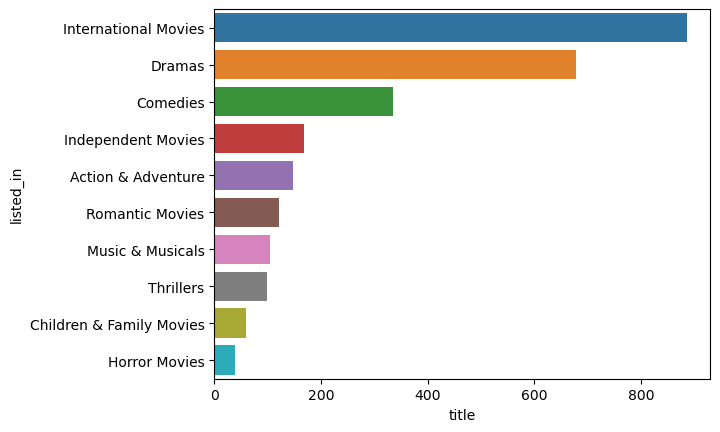

In [105]:
# check for popular genre in India
popIndGenre = indianMovies.groupby('listed_in').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.barplot(data=popIndGenre[:10],x='title',y='listed_in')

1. Popular genre in Indian Movies are International Movies, Dramas, Comedies, Independant Movies, Action & Adventure.

<Axes: xlabel='release_year', ylabel='title'>

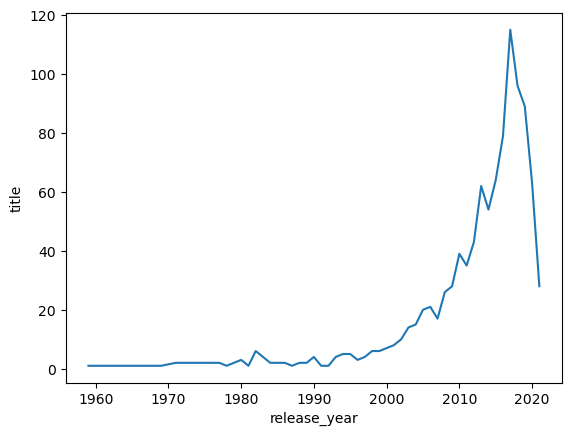

In [106]:
# release Year 
popInd = indianMovies.groupby('release_year').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.lineplot(data=popInd,x='release_year',y='title')

1.  Due course of time movies released till 2010 added increasingly, we could see a dip from 2018 to 2021

<Axes: xlabel='rating', ylabel='title'>

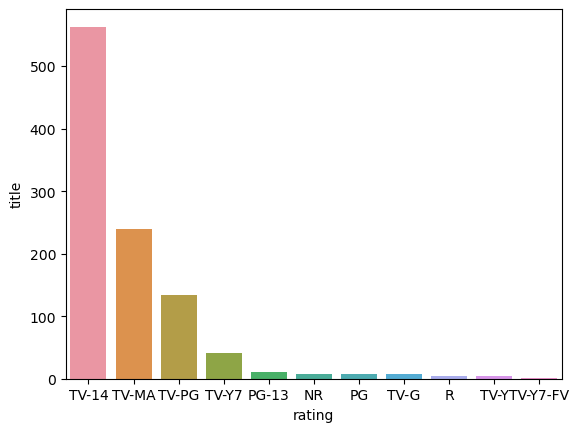

In [107]:
# Popular Ratigs in India
popIndRatings = indianMovies.groupby('rating').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.barplot(data=popIndRatings,x='rating',y='title')

1. Popular ratings in india are TV-14, TV-MA, TV-PG

<Axes: xlabel='duration', ylabel='title'>

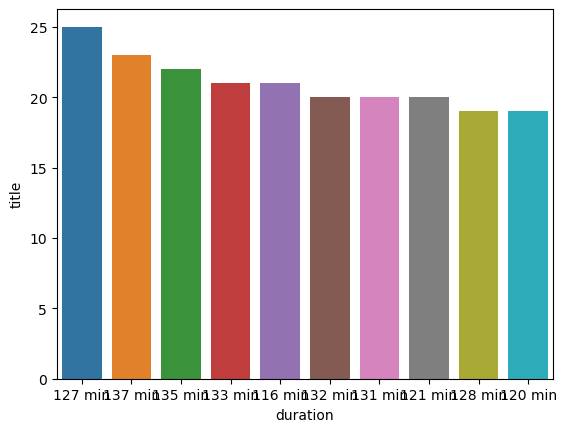

In [108]:
# Check for popular movie time generally people watch in INdia:
popIndDuation = indianMovies.groupby('duration').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.barplot(data=popIndDuation[:10],x='duration',y='title')

1. The watch time of indian movies are 127mins, 137mins, 135 mins etc.

<Axes: xlabel='month_added', ylabel='title'>

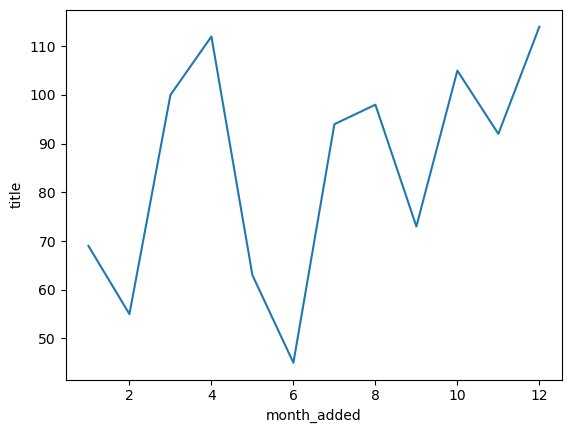

In [109]:
# check for month in which more indian movies been added to platform
popIndMonth =  indianMovies.groupby('month_added').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.lineplot(data=popIndMonth,x='month_added',y='title')

1. More movies added to platfrom in the month of April and towards the year end.

<Axes: xlabel='year_added', ylabel='title'>

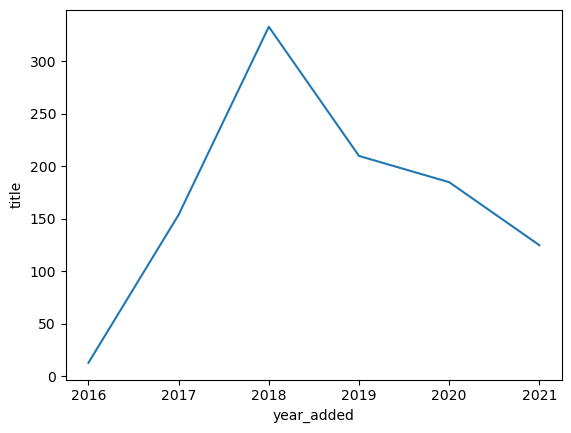

In [110]:
# check for year in which more indian movies been added to platform
popIndYear =  indianMovies.groupby('year_added').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.lineplot(data=popIndYear,x='year_added',y='title')

1. Movies added to platform gradually increased till 2018 and could see a dip after 2018.

In [111]:
# lets explore & analyse indian Tv shows
indianShows.head()

,title,directors,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,duration_copy,modified_date_added,month_added,year_added
87,Kota Factory,unknown directors,Mayur More,India,International TV Shows,s5,TV Show,24,2021,TV-MA,2 Seasons,<1,2021-09-24,9,2021
88,Kota Factory,unknown directors,Mayur More,India,Romantic TV Shows,s5,TV Show,24,2021,TV-MA,2 Seasons,<1,2021-09-24,9,2021
89,Kota Factory,unknown directors,Mayur More,India,TV Comedies,s5,TV Show,24,2021,TV-MA,2 Seasons,<1,2021-09-24,9,2021
90,Kota Factory,unknown directors,Jitendra Kumar,India,International TV Shows,s5,TV Show,24,2021,TV-MA,2 Seasons,<1,2021-09-24,9,2021
91,Kota Factory,unknown directors,Jitendra Kumar,India,Romantic TV Shows,s5,TV Show,24,2021,TV-MA,2 Seasons,<1,2021-09-24,9,2021


<Axes: xlabel='title', ylabel='directors'>

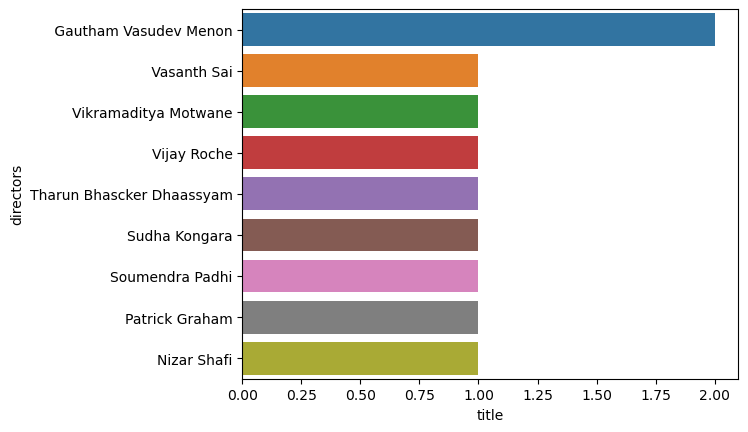

In [112]:
# Popular Tv show directors in India
popShowDir = indianShows.groupby('directors').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.barplot(data=popShowDir[1:10],y='directors',x='title',orient='h')

1. Popular Tv Shows director in India are Gautham Vasudev Menon, Vasanth Sai, Vikramaditya Motwane, Vijay Roche, Tharun Bhascker Dhaassyam

<Axes: xlabel='title', ylabel='cast'>

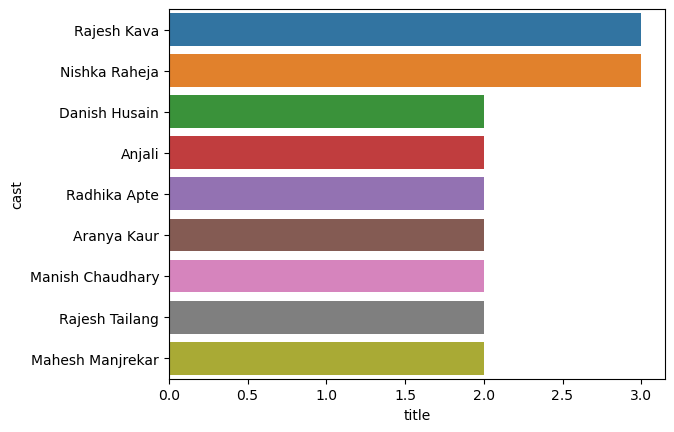

In [113]:
# Popular Tv show actors in India
popShowActor = indianShows.groupby('cast').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.barplot(data=popShowActor[1:10],y='cast',x='title',orient='h')

1.popular Tvshow actors are Rajesh Kava, nishka Raheja,danish Husain, Anjali

<Axes: xlabel='title', ylabel='listed_in'>

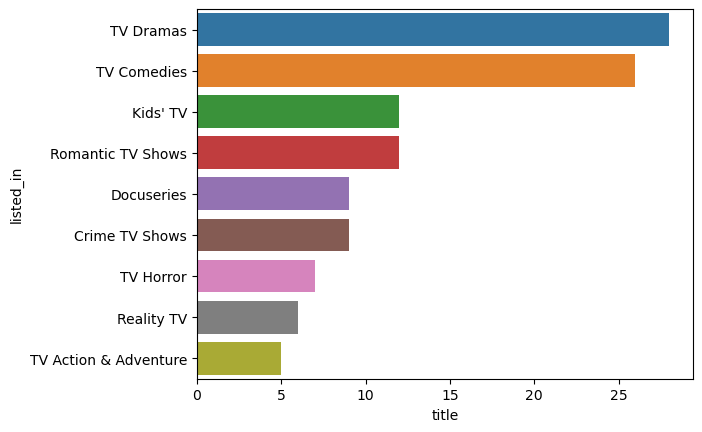

In [114]:
# Popular Tv show genre India
popShowGenre = indianShows.groupby('listed_in').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.barplot(data=popShowGenre[1:10],y='listed_in',x='title',orient='h')

1. Popular tv show genre are Tv Dramas, Tv Comedies, Kids TV. Romantic TV shows etc

<Axes: xlabel='release_year', ylabel='title'>

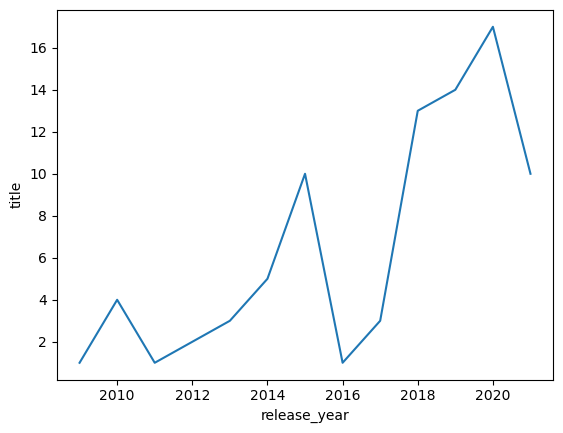

In [115]:
# check for release years for tv shows in india.
popInd = indianShows.groupby('release_year').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.lineplot(data=popInd,x='release_year',y='title')

1. more Tv show released in year 2019 and decreased till 2021

<Axes: xlabel='rating', ylabel='title'>

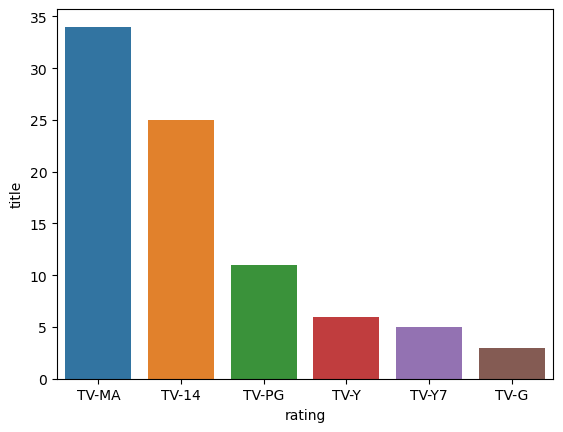

In [116]:
# Popular Ratigs in India
popIndRatings = indianShows.groupby('rating').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.barplot(data=popIndRatings,x='rating',y='title')

1. Popular Tv SHow ratings in india are TV-MA, Tv-14, TV-PG, TV-Y etc

<Axes: xlabel='duration', ylabel='title'>

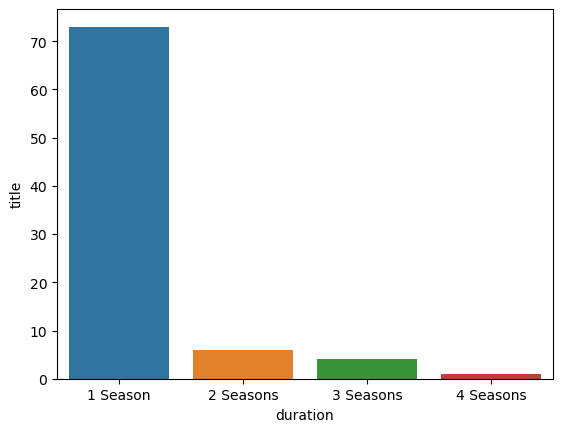

In [117]:
# Check for popular movie time generally people watch in INdia:
popIndDuation = indianShows.groupby('duration').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.barplot(data=popIndDuation[:10],x='duration',y='title')

1. Generally people india whatch tv shows of 1season

<Axes: xlabel='month_added', ylabel='title'>

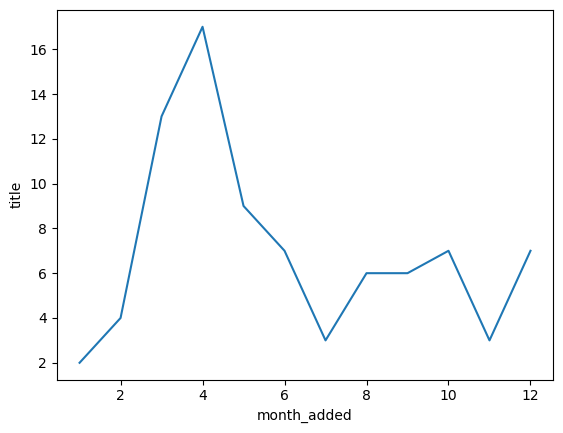

In [118]:
# check for month in which more indian movies been added to platform
popIndMonth =  indianShows.groupby('month_added').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.lineplot(data=popIndMonth,x='month_added',y='title')

1. MOre tv shows been added to platform in the month of April.

<Axes: xlabel='year_added', ylabel='title'>

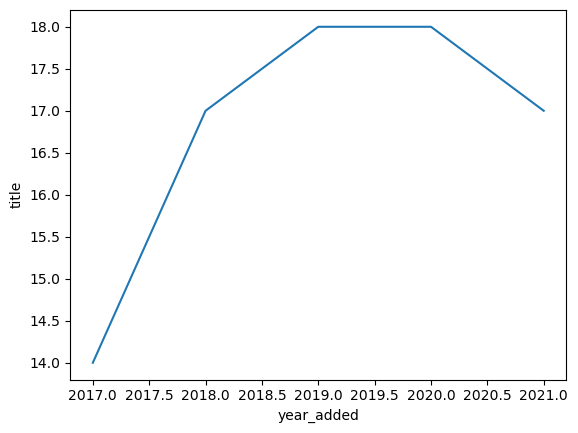

In [119]:
# check for year in which more indian movies been added to platform
popIndYear =  indianShows.groupby('year_added').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.lineplot(data=popIndYear,x='year_added',y='title')

1. could see a decreased trend in adding Tv shows after 2020.

## Will explore MOvies/TVshows trends from United Kingdom:

In [120]:
df_final_copy.head()

,title,directors,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,duration_copy,modified_date_added,month_added,year_added
0,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,Documentaries,s1,Movie,25,2020,PG-13,90 min,80-100,2021-09-25,9,2021
1,Blood & Water,unknown directors,Ama Qamata,South Africa,International TV Shows,s2,TV Show,24,2021,TV-MA,2 Seasons,<1,2021-09-24,9,2021
2,Blood & Water,unknown directors,Ama Qamata,South Africa,TV Dramas,s2,TV Show,24,2021,TV-MA,2 Seasons,<1,2021-09-24,9,2021
3,Blood & Water,unknown directors,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,24,2021,TV-MA,2 Seasons,<1,2021-09-24,9,2021
4,Blood & Water,unknown directors,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,24,2021,TV-MA,2 Seasons,<1,2021-09-24,9,2021


In [121]:
ukmovies = df_final_copy.loc[(df_final_copy['country']=='United Kingdom') & (df_final_copy['type']=='Movie')]
ukshows = df_final_copy.loc[(df_final_copy['country']=='United Kingdom') & (df_final_copy['type']=='TV Show')]
ukmovies

,title,directors,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,duration_copy,modified_date_added,month_added,year_added
188,Sankofa,Haile Gerima,Kofi Ghanaba,United Kingdom,Dramas,s8,Movie,24,1993,TV-MA,125 min,120-150,2021-09-24,9,2021
189,Sankofa,Haile Gerima,Kofi Ghanaba,United Kingdom,Independent Movies,s8,Movie,24,1993,TV-MA,125 min,120-150,2021-09-24,9,2021
190,Sankofa,Haile Gerima,Kofi Ghanaba,United Kingdom,International Movies,s8,Movie,24,1993,TV-MA,125 min,120-150,2021-09-24,9,2021
206,Sankofa,Haile Gerima,Oyafunmike Ogunlano,United Kingdom,Dramas,s8,Movie,24,1993,TV-MA,125 min,120-150,2021-09-24,9,2021
207,Sankofa,Haile Gerima,Oyafunmike Ogunlano,United Kingdom,Independent Movies,s8,Movie,24,1993,TV-MA,125 min,120-150,2021-09-24,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201429,You Can Tutu,James Brown,Zahra Hassan Malik,United Kingdom,Children & Family Movies,s8787,Movie,31,2017,TV-G,87 min,80-100,2017-12-31,12,2017
201430,You Can Tutu,James Brown,Cleo Badcock,United Kingdom,Children & Family Movies,s8787,Movie,31,2017,TV-G,87 min,80-100,2017-12-31,12,2017
201431,You Can Tutu,James Brown,Stuart Manning,United Kingdom,Children & Family Movies,s8787,Movie,31,2017,TV-G,87 min,80-100,2017-12-31,12,2017
201432,You Can Tutu,James Brown,Ali Bastian,United Kingdom,Children & Family Movies,s8787,Movie,31,2017,TV-G,87 min,80-100,2017-12-31,12,2017


<Axes: xlabel='title', ylabel='directors'>

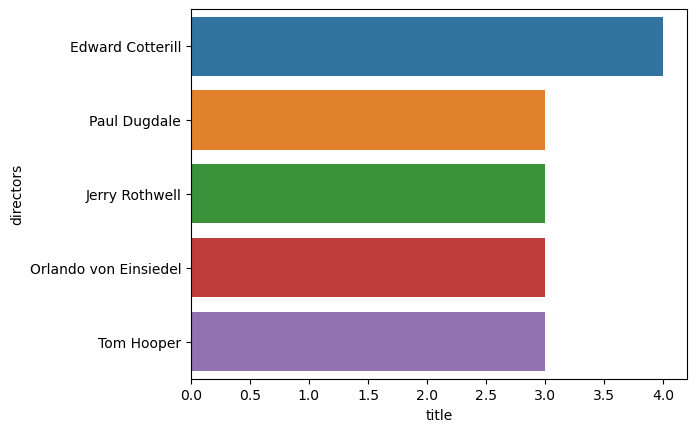

In [122]:
# Check for popular movie directors in UK:
popukmovdir = ukmovies.groupby('directors').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.barplot(data=popukmovdir[1:6],x='title',y='directors',orient='h')

In [123]:
# Popular movies directors in Uk are Edward Cotterill, Paul Dugdale, Jerry Rothwell, Orland Von Einsiedel, Tom Hooper

<Axes: xlabel='title', ylabel='directors'>

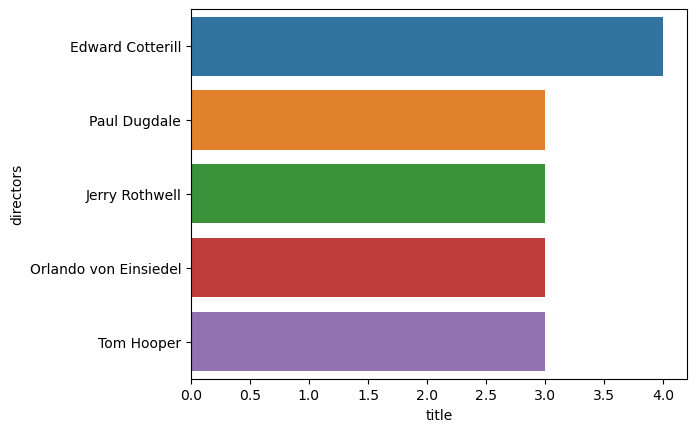

In [124]:
# Check for popular movie directors in UK:
popukmovdir = ukmovies.groupby('directors').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.barplot(data=popukmovdir[1:6],x='title',y='directors',orient='h')

<Axes: xlabel='title', ylabel='directors'>

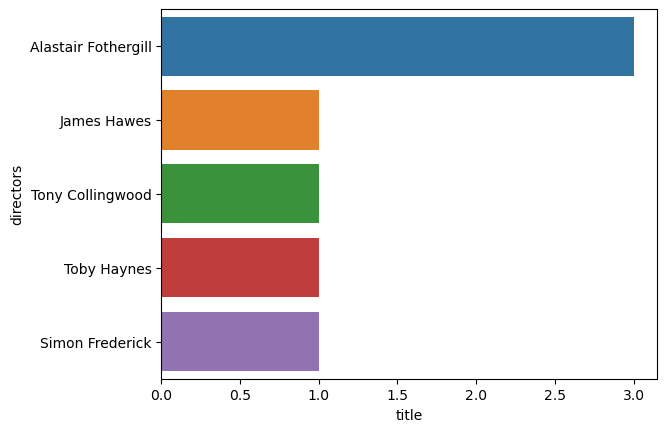

In [125]:
# Check for popular TVSHOW directors in UK:
popshowdir = ukshows.groupby('directors').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.barplot(data=popshowdir[1:6],x='title',y='directors',orient='h')

1. Popular tvshow directors are Alastair Fothergill, James Hawes, Tony Collingwood, Toby Haynes, Simon Frederick

<Axes: xlabel='title', ylabel='cast'>

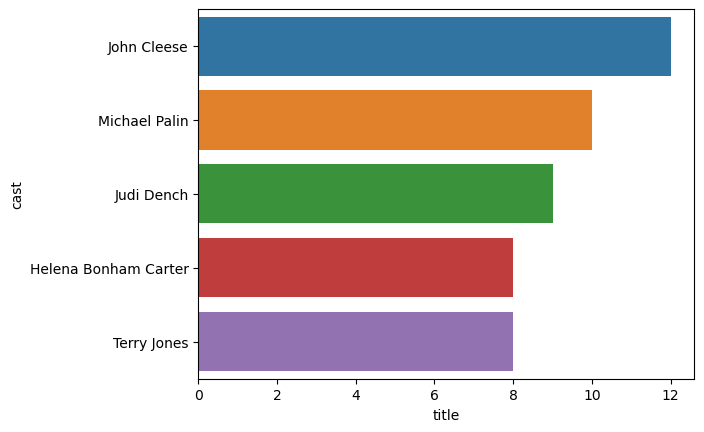

In [126]:
#uk cast
popukmovdir = ukmovies.groupby('cast').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.barplot(data=popukmovdir[1:6],x='title',y='cast',orient='h')

<Axes: xlabel='title', ylabel='cast'>

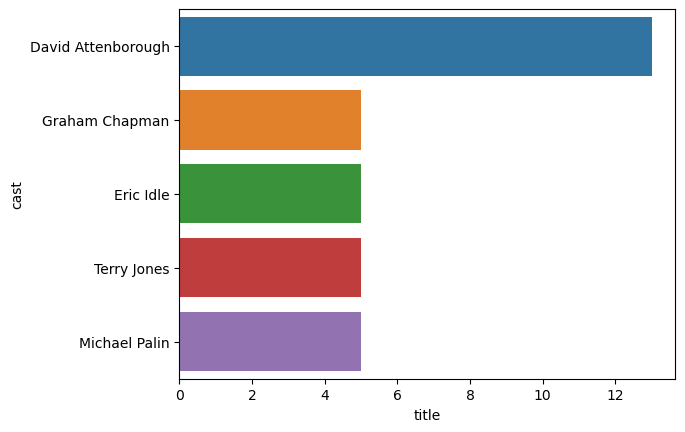

In [127]:
# Check for popular TVSHOW actors in UK:
popshowdir = ukshows.groupby('cast').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.barplot(data=popshowdir[1:6],x='title',y='cast',orient='h')

1. Popular MOvie Actors in Uk are John cleese,michael palin, Judi Dench, Helena Bonham carter.
2.Popular Tvshow Atcors in uk are David Attenborough, Graham Chapman, Eric idle, Terry Jones etc

<Axes: xlabel='title', ylabel='listed_in'>

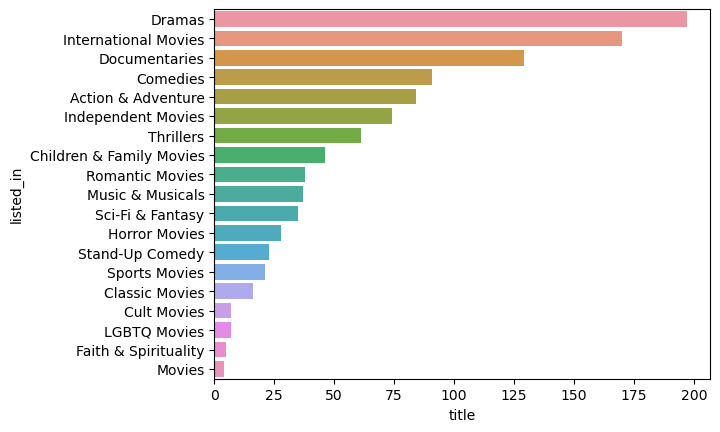

In [128]:
# Check for movie genre
popukmovdir = ukmovies.groupby('listed_in').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.barplot(data=popukmovdir,x='title',y='listed_in',orient='h')

<Axes: xlabel='title', ylabel='listed_in'>

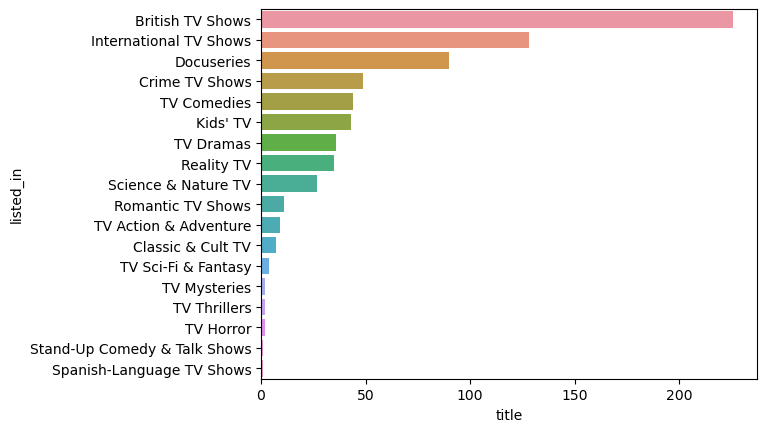

In [129]:
# Check for Tvshow Genre
popshowdir = ukshows.groupby('listed_in').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.barplot(data=popshowdir,x='title',y='listed_in',orient='h')

1.popular movie genre are Dramas, INternational MOvies,Documentaries, Comedies, Action&Adventure,Independant movies
2. Popular Tvshow genre are British TV Shiws, International Tv SHows, Docueries, Crime Tv shows

<Axes: xlabel='release_year', ylabel='title'>

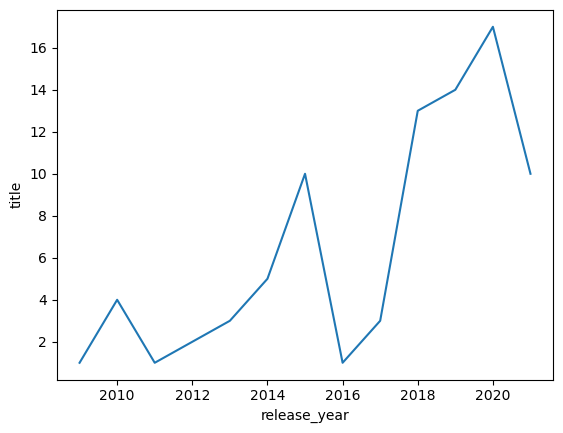

In [130]:
# check for release years for movies in Uk.
popuk = ukmovies.groupby('release_year').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.lineplot(data=popInd,x='release_year',y='title')

<Axes: xlabel='release_year', ylabel='title'>

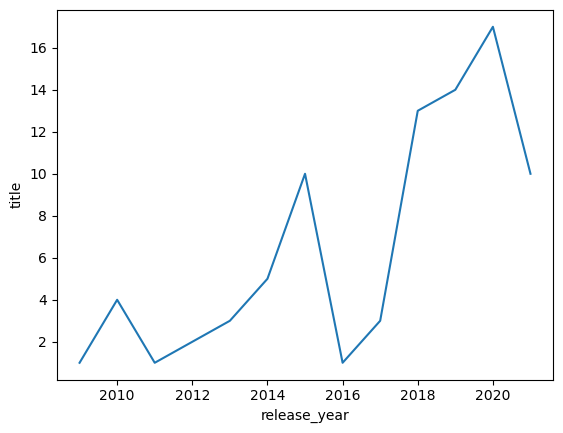

In [131]:
# check for release years for tv shows in UK.
popuk = ukshows.groupby('release_year').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.lineplot(data=popInd,x='release_year',y='title')

1. more Tv show released in year 2019 and decreased till 2021 and same with Movies

<Axes: xlabel='rating', ylabel='title'>

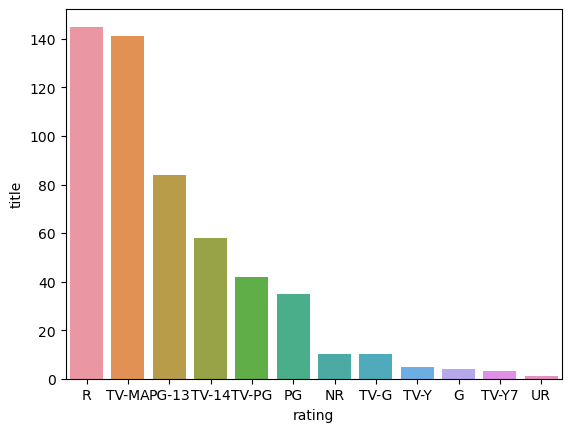

In [132]:
# Popular Ratigs in uk
popIndRatings = ukmovies.groupby('rating').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.barplot(data=popIndRatings,x='rating',y='title')

<Axes: xlabel='rating', ylabel='title'>

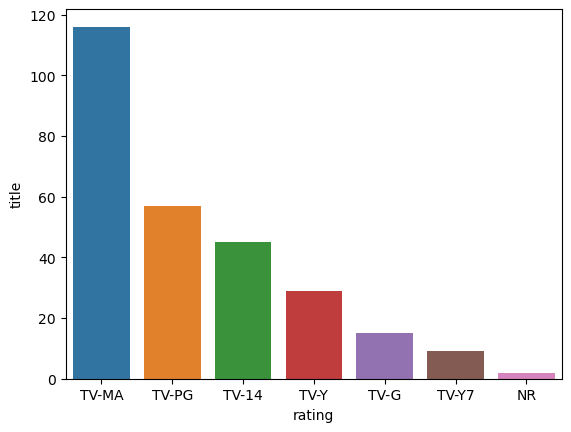

In [133]:
# Popular Ratigs in uk
popIndRatings = ukshows.groupby('rating').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.barplot(data=popIndRatings,x='rating',y='title')

1. Popular movie rating in Uk are R, TV-MA, PG-13,TV-14
2. Popular tvshows rating in uk are TV_MA,tv-PG,TV-14,TV

<Axes: xlabel='duration', ylabel='title'>

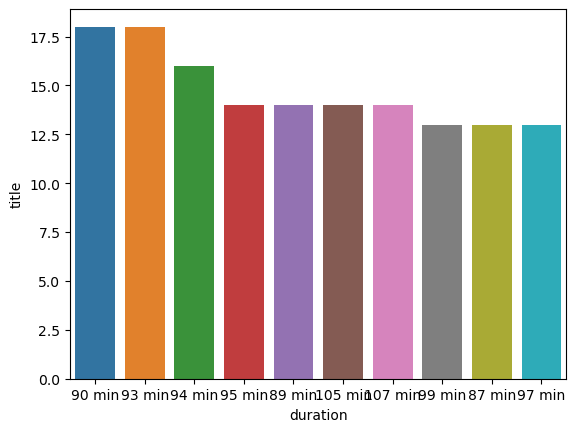

In [135]:
# Check for popular movie time generally people watch in uk:
popukmoviesDuation = ukmovies.groupby('duration').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.barplot(data=popukmoviesDuation[:10],x='duration',y='title')

<Axes: xlabel='duration', ylabel='title'>

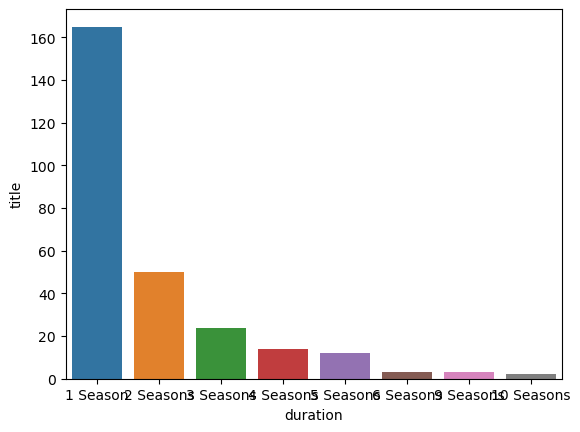

In [136]:
# Check for popular show time generally people watch in uk:
popukshowsDuation = ukshows.groupby('duration').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.barplot(data=popukshowsDuation[:10],x='duration',y='title')

1.Popular movie times in uk country are 90min,93 min,etc
2. Most popular watch time of TV shows in Uk are 1 season.

In [137]:
ukshows.columns

Index(['title', 'directors', 'cast', 'country', 'listed_in', 'show_id', 'type',
       'date_added', 'release_year', 'rating', 'duration', 'duration_copy',
       'modified_date_added', 'month_added', 'year_added'],
      dtype='object')

<Axes: xlabel='month_added', ylabel='title'>

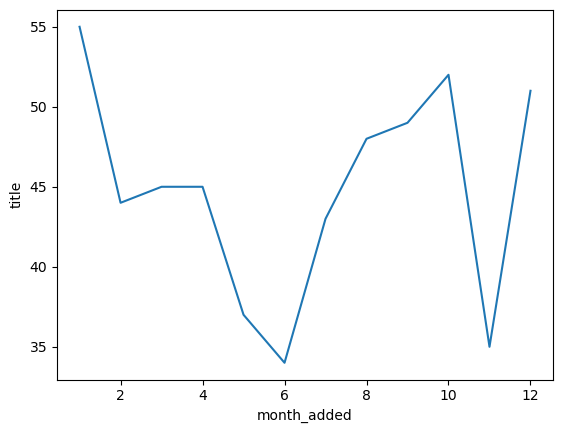

In [139]:
# check for month in which more Uk movies been added to platform
popukMonth =  ukmovies.groupby('month_added').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.lineplot(data=popukMonth,x='month_added',y='title')

<Axes: xlabel='month_added', ylabel='title'>

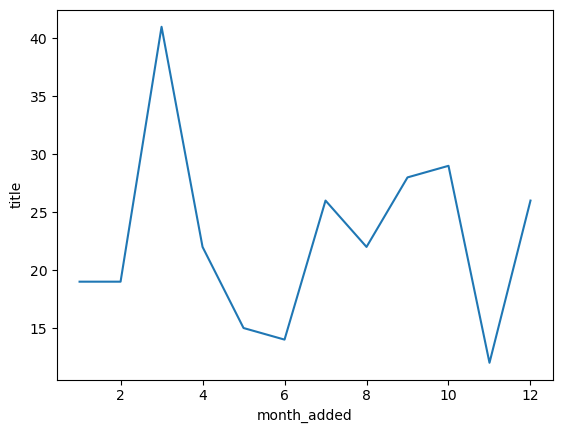

In [140]:
# check for month in which more Uk movies been added to platform
popushows =  ukshows.groupby('month_added').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.lineplot(data=popushows,x='month_added',y='title')

1.more movies been added to platform in the month of october, jan
2. more tvshows been added to platform in the month ofmarch and october.

<Axes: xlabel='year_added', ylabel='title'>

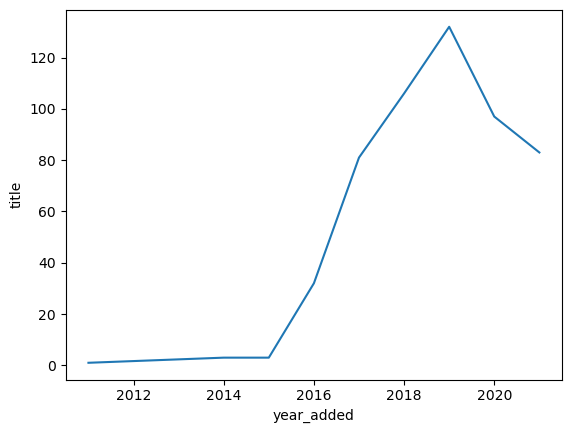

In [141]:
# check for year in which more uk movies been added to platform
popukYear =  ukmovies.groupby('year_added').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.lineplot(data=popukYear,x='year_added',y='title')

<Axes: xlabel='year_added', ylabel='title'>

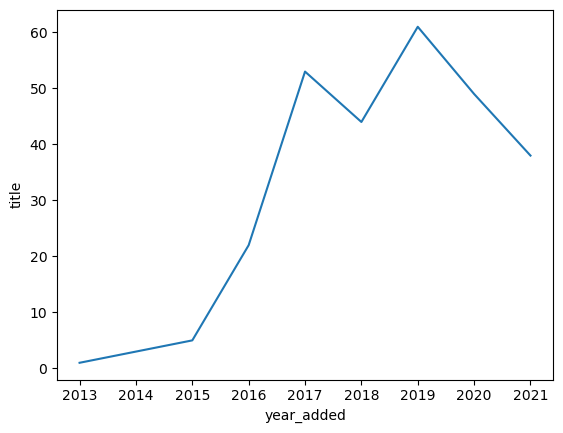

In [142]:
# check for year in which more uk shows been added to platform
popukYear =  ukshows.groupby('year_added').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
sns.lineplot(data=popukYear,x='year_added',y='title')

1. We could see a decreasing trends with # of movies added in a year from 2018
2.We could see a decreasing trends with # of shows added in a year from 2019

Recommendations, Analysis & Insights:
1) The most popular Genres across the countries and in both TV Shows and Movies are Drama, Comedy and International TV Shows/Movies.

2)Add TV Shows in July/August and Movies in last week of the year/first month of the next year.

3)For USA audience 80-120 mins is the recommended length for movies and Kids TV Shows are also popular along with the genres in first point.

4)For UK audience, recommended length for movies is same as that of USA (80-120 mins)

5)The target audience in USA and India is recommended to be 14+ and above ratings while for UK, its recommended to be completely Mature/R content .

6)Add movies for Indian Audience, it has been declining since 2018.

7)Anime Genre for Japan and Romantic Genre in TV Shows for South Korean audiences is recommended.

8) While creating content, take into consideration the popular actors/directors for that country. Also take into account the director-actor combination which is highly recommended.